In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("D:/Data science/mlr.csv")
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.isnull().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature 1  200 non-null    float64
 1   Feature 2  200 non-null    float64
 2   Feature 3  200 non-null    float64
 3   Target     200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
x = df.iloc[:, df.columns != "Target"]
y = df.loc[:,'Target']

In [9]:
x.shape, y.shape

((200, 3), (200,))

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [22]:
mlr.coef_

array([0.04372216, 0.20681505, 0.00919034])

In [23]:
mlr.intercept_

2.4843422382763

In [20]:
pr = mlr.predict(x_test)

In [21]:
mse = mean_squared_error(y_test, pr)
mse

3.360209552561257

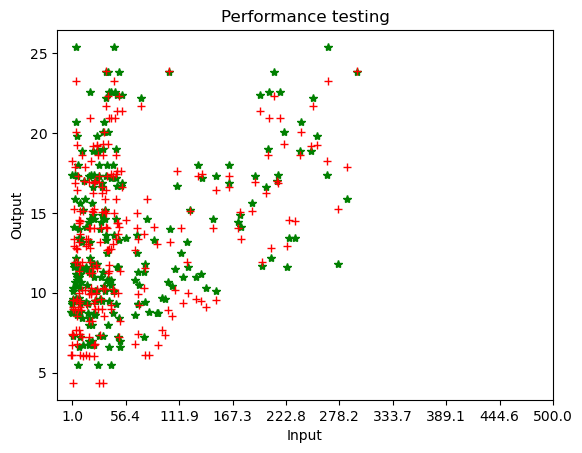

In [26]:
plt.plot(x_test, y_test, "*", color = "green")
plt.plot(x_test, pr, "+", color = "red")
plt.title("Performance testing")
plt.xlabel("Input")
plt.xticks(np.linspace(1, 500, 10))
plt.ylabel("Output")
plt.show()

# Linear Regression with OLS Summary

In [27]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [28]:
x_with_constant = sm.add_constant(x_train)

In [34]:
x_with_constant.head()

,const,Feature 1,Feature 2,Feature 3
60,1.0,53.5,2.0,21.4
78,1.0,5.4,29.9,9.4
128,1.0,220.3,49.0,3.2
69,1.0,216.8,43.9,27.2
177,1.0,170.2,7.8,35.2


In [30]:
model = sm.OLS(y_train, x_with_constant)
result = model.fit()

In [32]:
result.params

const        2.484342
Feature 1    0.043722
Feature 2    0.206815
Feature 3    0.009190
dtype: float64

In [36]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     393.1
Date:                Mon, 06 May 2024   Prob (F-statistic):           1.37e-60
Time:                        13:57:34   Log-Likelihood:                -230.11
No. Observations:                 120   AIC:                             468.2
Df Residuals:                     116   BIC:                             479.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4843      0.396      6.266      0.0

In [40]:
x_test = sm.add_constant(x_test)
pr = result.predict(x_test)

In [41]:
residual = y_test - pr

In [42]:
residual

95     0.254304
52     1.666056
143    1.847326
94     1.324312
83    -1.405384
         ...   
91     2.951700
123    0.063698
142    0.760347
33    -0.836007
79     1.639114
Length: 80, dtype: float64

# Homoscedasticity

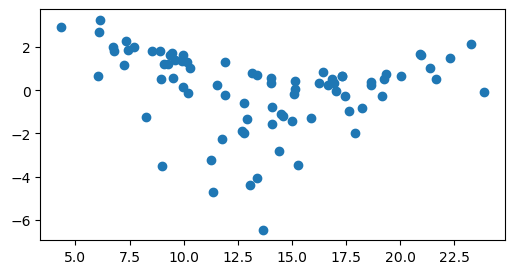

In [44]:
fig, ax = plt.subplots(figsize = (6, 3))
ax.scatter(pr, residual)

# Normality of Residual

C:\Users\DHRUV\AppData\Local\Temp\ipykernel_8288\1108040850.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


<Axes: ylabel='Density'>

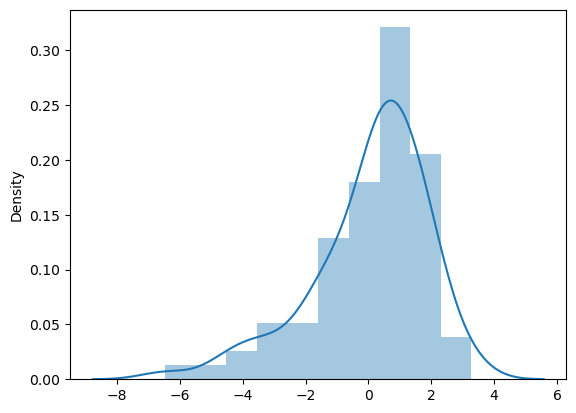

In [46]:
sns.distplot(residual)